<a href="https://colab.research.google.com/github/maybje/CE888/blob/master/assignment1/imbalanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CE888-Assignment 1
##Project 2: Learning from Imbalanced Datasets (Supervised and Unsupervised Learning)

In [0]:
import os
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import re

from matplotlib import gridspec
from sklearn.preprocessing import LabelEncoder, StandardScaler
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA



### 1. Load, prepare, and inspect the datasets.
- Import data from GitHub
- After loading the data we examine NA values and decide wether to delete observations or columns based on the proportion of NAs for a specific feature.

a) Pulsars data set

In [4]:
# Load the data set on Pulsars
df1 = pd.read_csv('https://raw.githubusercontent.com/maybje/CE888/master/assignment1/data/pulsar_stars.csv')
df1.head()

Mean of the integrated profile  ...  target_class
0                       140.562500  ...             0
1                       102.507812  ...             0
2                       103.015625  ...             0
3                       136.750000  ...             0
4                        88.726562  ...             0

[5 rows x 9 columns]

In [5]:
#Before splitting into test and training set, we explore the size and the class proportions in order to confirm it has the right level of imbalance
print("Shape: ", df1.shape)
#Class proportions

print("Class Proportions:\n", df1["target_class"].value_counts()/df1["target_class"].shape)

Shape:  (17898, 9)
Class Proportions:
 0    0.908426
1    0.091574
Name: target_class, dtype: float64


In [0]:
#Split into 90-10
X_1=df1.iloc[:,0:-1].copy()
Y_1=df1.iloc[:,-1].copy()

x_1=X_1.values
y_1=Y_1.values

features1=X_1.columns
x1_train, x1_test, y1_train, y1_test=train_test_split(x_1,y_1, train_size=0.9, random_state=21, stratify=y_1)

In [7]:
#We check the proportions of the sets to confirm the imbalance is preserved
print("Train Shape: ", x1_train.shape)
#Class proportions
print("Train class Proportions:\n", pd.Series(y1_train).value_counts()/y1_train.shape)

print("Test shape: ", x1_test.shape)
#Class proportions
print("Test class Proportions:\n", pd.Series(y1_test).value_counts()/y1_test.shape)

Train Shape:  (16108, 8)
Train class Proportions:
 0    0.908431
1    0.091569
dtype: float64
Test shape:  (1790, 8)
Test class Proportions:
 0    0.90838
1    0.09162
dtype: float64


From this point we will work with the train set only. However, every transformation based on the training set will be applied to the test set too using the parameters of functions learned in the training set.

Text(0.5, 0, 'Class')

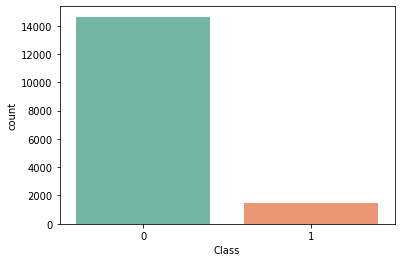

In [8]:
#plot the variables
##Response variable counts
sns.countplot(y1_train,palette="Set2")
plt.xlabel("Class")
#plt.savefig('df1_ir.pdf')
#files.download('df1_ir.pdf')

In [9]:
#We explore if there are any missing values
proportion=[]
for f in features1:
  proportion.append(pd.DataFrame(x1_train, columns=features1)[f].isna().sum(0)/x1_train.shape[0]*100)  
  print(f+": ", "{0:.2f}".format(pd.DataFrame(x1_train, columns=features1)[f].isna().sum(0)/x1_train.shape[0]*100))

print("Traget class: ", "{0:.2f}".format(pd.Series(y1_train).isna().sum(0)/y1_train.shape[0]*100))

 Mean of the integrated profile:  0.00
 Standard deviation of the integrated profile:  0.00
 Excess kurtosis of the integrated profile:  0.00
 Skewness of the integrated profile:  0.00
 Mean of the DM-SNR curve:  0.00
 Standard deviation of the DM-SNR curve:  0.00
 Excess kurtosis of the DM-SNR curve:  0.00
 Skewness of the DM-SNR curve:  0.00
Traget class:  0.00


In [33]:
# Descriptive sattistics in Latex format
print(pd.DataFrame(x1_train, columns=features1).describe().transpose().to_latex(float_format="%.2f")) #latex format for report

\begin{tabular}{lrrrrrrrr}
\toprule
{} &    count &   mean &    std &   min &    25\% &    50\% &    75\% &     max \\
\midrule
 Mean of the integrated profile               & 16108.00 & 111.11 &  25.71 &  5.81 & 100.94 & 115.13 & 127.25 &  192.62 \\
 Standard deviation of the integrated profile & 16108.00 &  46.54 &   6.83 & 24.77 &  42.39 &  46.94 &  50.99 &   91.81 \\
 Excess kurtosis of the integrated profile    & 16108.00 &   0.48 &   1.07 & -1.88 &   0.03 &   0.22 &   0.47 &    7.88 \\
 Skewness of the integrated profile           & 16108.00 &   1.78 &   6.20 & -1.79 &  -0.19 &   0.20 &   0.93 &   65.39 \\
 Mean of the DM-SNR curve                     & 16108.00 &  12.65 &  29.51 &  0.21 &   1.92 &   2.79 &   5.47 &  223.39 \\
 Standard deviation of the DM-SNR curve       & 16108.00 &  26.33 &  19.52 &  7.37 &  14.43 &  18.40 &  28.45 &  110.64 \\
 Excess kurtosis of the DM-SNR curve          & 16108.00 &   8.32 &   4.52 & -3.14 &   5.78 &   8.46 &  10.73 &   34.54 \\
 Skewness o

In [0]:
#Since the scales and distribution characteristics of the features are too different we decide to normalize them. 
#In this step we create a copy to visualize them in a boxplot.
#However during the cross-validation steps we will use the original training set and normalize it inside the loop. 
scaler=StandardScaler()
x1_train_norm=x1_train.copy()
x1_train_norm=scaler.fit_transform(x1_train_norm.copy())
y1_train_norm=y1_train.copy()

#we normalize the test set using the parameters of the training set.
x1_test_norm=x1_test.copy()
x1_test_norm=scaler.transform(x1_test_norm)
y1_test_norm=y1_test.copy()

Text(0.5, 0, 'variable')

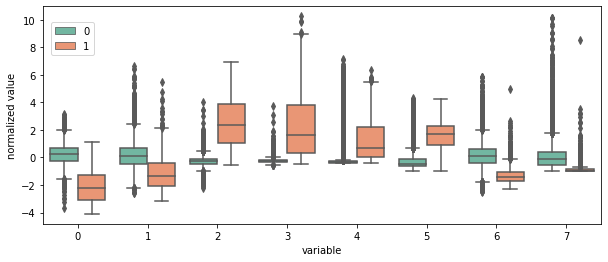

In [12]:
#Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x="variable", y="value", hue="target_class",\
    data=pd.melt(pd.DataFrame(x1_train_norm).join(pd.Series(y1_train_norm,name='target_class').astype(str)),id_vars=['target_class']),palette="Set2")
plt.legend(bbox_to_anchor=(0.1,0.95))
plt.ylabel("normalized value")
plt.xlabel("variable")
#plt.xticks()
#plt.savefig('df1_box.pdf')
#files.download('df1_box.pdf')

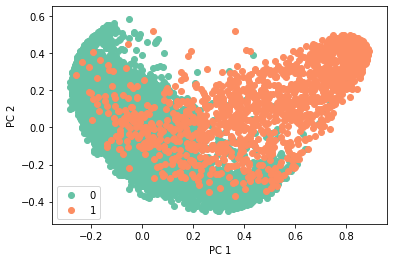

In [13]:
#Scatterplot to the first two principal components using labels
pca = PCA()
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=.01)

x1_train_pca = scikit_kpca.fit_transform(x1_train_norm)

colors = ['#66c2a5','#fc8d62']

for l, c in zip(np.unique(y1_train_norm), colors):
    plt.scatter(x1_train_pca[y1_train == l, 0], 
                x1_train_pca[y1_train == l, 1], 
                c=c, label=l)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()


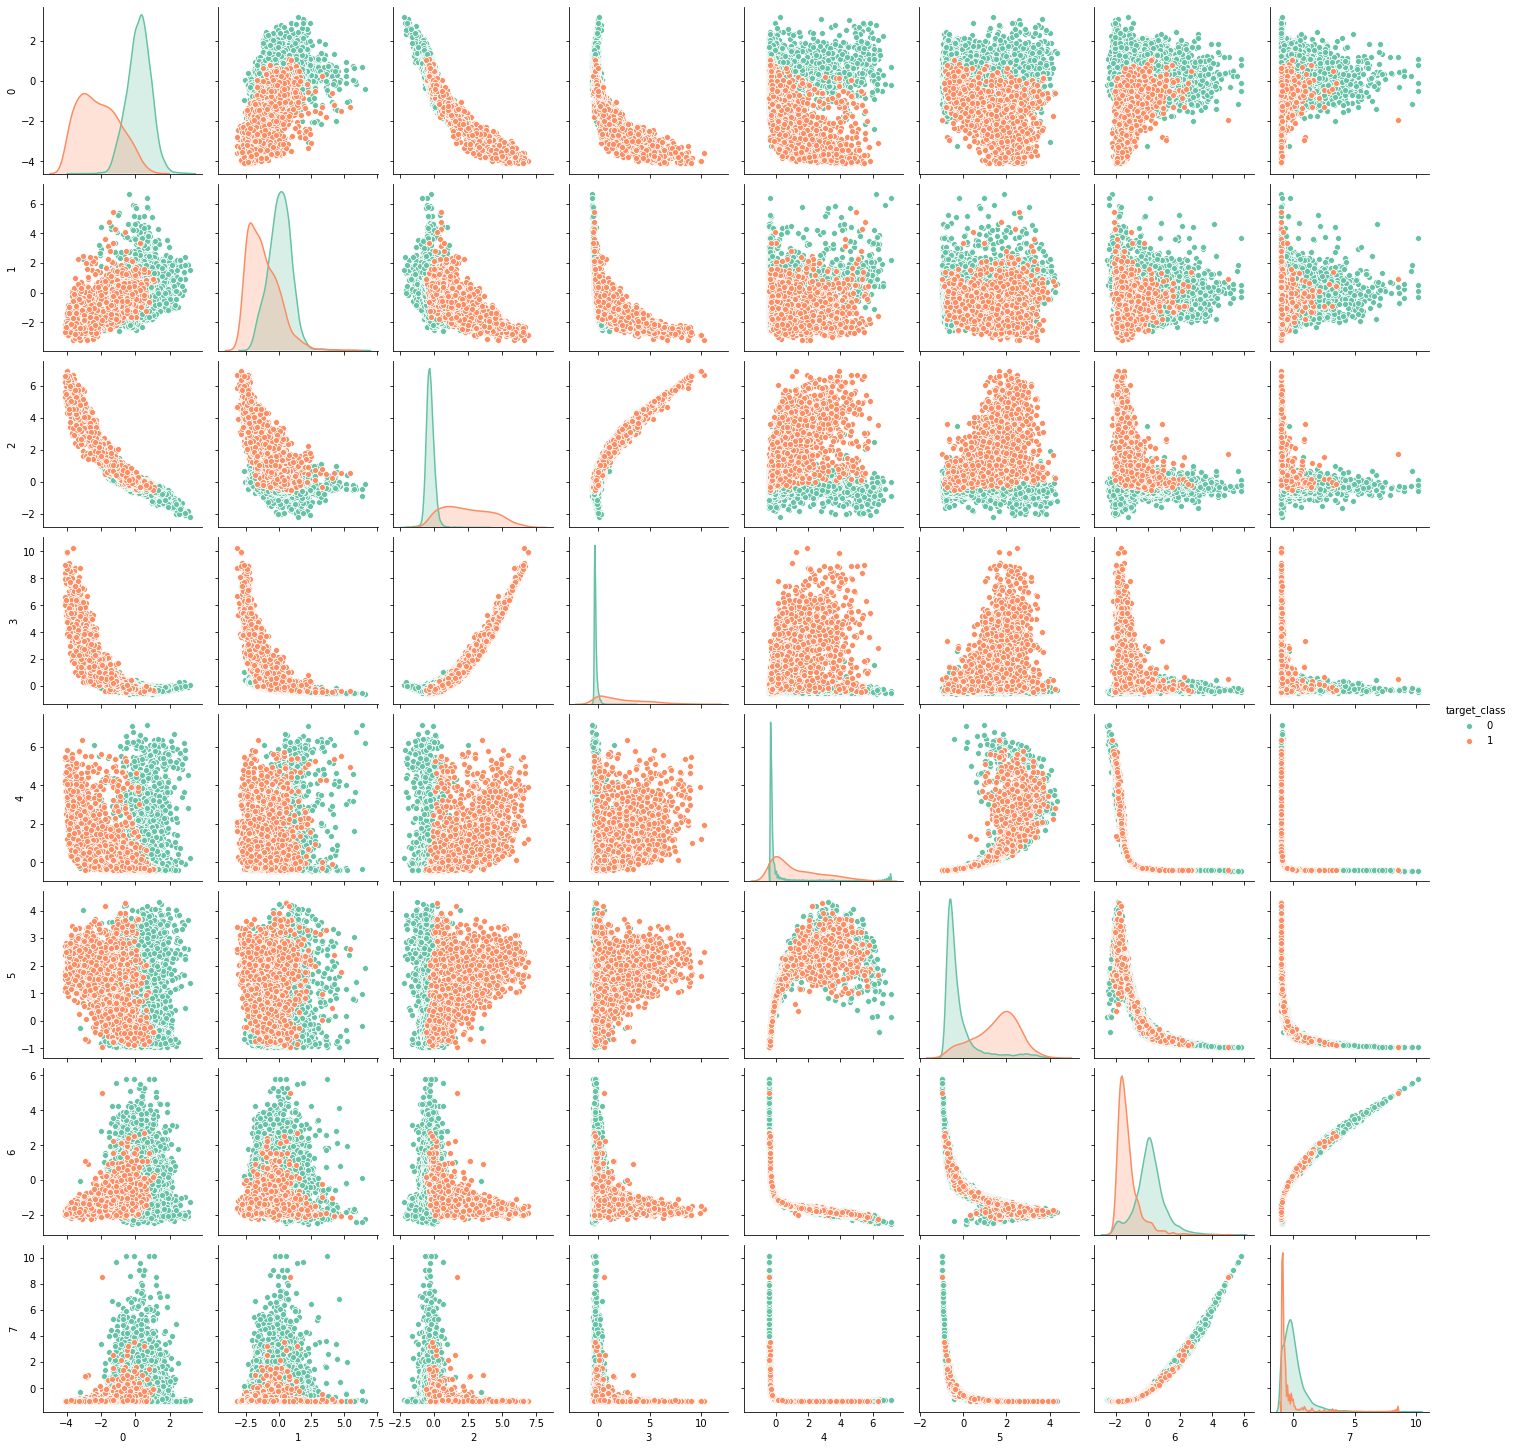

In [0]:
#Scatter and densityplotts of all the variables
sns.pairplot(pd.DataFrame(x1_train_norm).join(pd.Series(y1_train_norm,name="target_class")), hue="target_class", palette="Set2")

b) Australia's weather data set

In [19]:
# Load the data set on Australia's weather
df2 = pd.read_csv('https://raw.githubusercontent.com/maybje/CE888/master/assignment1/data/weatherAUS.csv')
df2.head()

Date Location  MinTemp  ...  RainToday  RISK_MM  RainTomorrow
0  2008-12-01   Albury     13.4  ...         No      0.0            No
1  2008-12-02   Albury      7.4  ...         No      0.0            No
2  2008-12-03   Albury     12.9  ...         No      0.0            No
3  2008-12-04   Albury      9.2  ...         No      1.0            No
4  2008-12-05   Albury     17.5  ...         No      0.2            No

[5 rows x 24 columns]

In [20]:
#Before splitting into test and training set, we explore the size and the class proportions in order to confirm it has the right level of imbalance
print("Shape: ", df2.shape)
#Class proportions
print("Class Proportions:\n", df2["RainTomorrow"].value_counts()/df2["RainTomorrow"].shape)

Shape:  (142193, 24)
Class Proportions:
 No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64


In [0]:
#Split into 90-10
X_2=df2.iloc[:,0:-2].copy()
Y_2=df2.iloc[:,-1].copy()

x_2=X_2.copy()
y_2=Y_2.copy()

features2=X_2.columns
x2_train, x2_test, y2_train, y2_test=train_test_split(x_2,y_2, train_size=0.9, random_state=21, stratify=y_2)

In [22]:
#We check the proportions of the sets to confirm the imbalance is preserved
print("Train Shape: ", x2_train.shape)
#Class proportions
print("Train class Proportions:\n", y2_train.value_counts()/y2_train.shape)

print("Test shape: ", x2_test.shape)
#Class proportions
print("Test class Proportions:\n", y2_test.value_counts()/y2_test.shape)

Train Shape:  (127973, 22)
Train class Proportions:
 No     0.77582
Yes    0.22418
Name: RainTomorrow, dtype: float64
Test shape:  (14220, 22)
Test class Proportions:
 No     0.775809
Yes    0.224191
Name: RainTomorrow, dtype: float64


From this point we will work with the train set only. However, every transformation based on the training set will be applied to the test set too using the parameters of functions learned in the training set.

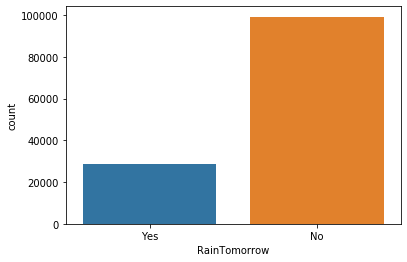

In [23]:
#plot the variables
##Response variable
 sns.countplot(y2_train)

In [0]:
#Estimate the proportion of NAs in Evaporation, Sunshine, Cloud9am and	Cloud3pm columns
proportion=[]
for f in features2:
  proportion.append(x2_train[f].isna().sum(0)/x2_train.shape[0]*100)  
 # print(f+": ", "{0:.2f}".format(x2_train[f].isna().sum(0)/x2_train.shape[0]*100))

#print("Traget class: ", "{0:.2f}".format(y2_train.isna().sum(0)/y2_train.shape[0]*100))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

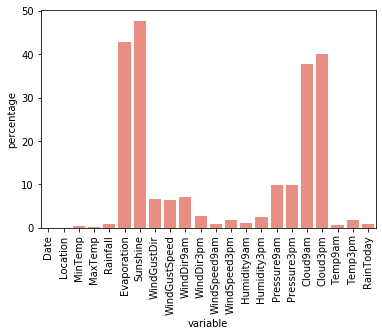

In [25]:
#Plot percentage of missing values per variable
sns.barplot(features2,proportion,color="salmon")
plt.ylabel("percentage")
plt.xlabel("variable")
plt.xticks(rotation=90)

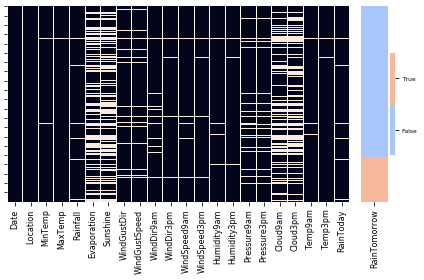

In [26]:
##Matrix plot of missing values
y_s=pd.DataFrame(y2_train,columns=["RainTomorrow"])[["RainTomorrow"]].copy().apply(LabelEncoder().fit_transform)["RainTomorrow"].sort_values()
x_s=x2_train.copy().reindex(y_s.index.tolist())
x_s=x_s.reset_index(drop=True)
fig = plt.figure() #figsize=(6, 4)
gs = gridspec.GridSpec(1, 2, width_ratios=[10, 1])
ax1=plt.subplot(gs[0])
sns.heatmap(x_s.isnull(), ax=ax1,cbar=False)
ax2=plt.subplot(gs[1])
cmap = sns.color_palette("coolwarm", 2)
sns.heatmap(y_s.to_frame(), ax=ax2,  cmap=cmap)
colorbar=ax2.collections[0].colorbar
r=colorbar.vmax-colorbar.vmin
colorbar.set_ticks([colorbar.vmin + r /2 * (0.5 + i) for i in range(2)])
colorbar.set_ticklabels(list(["False","True"]))
colorbar.ax.tick_params(labelsize=6)
ax1.tick_params(axis='x',labelsize=8)
ax1.set_yticklabels([])
ax2.tick_params(axis="x", labelsize=8)
ax2.set_yticklabels([])
ax2.set_yticks([])
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
plt.tight_layout()

In [27]:
#Based on this we decide to delete this columns
drop_col=["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"]

x2_train=x2_train.drop(columns=drop_col)
x2_test=x2_test.drop(columns=drop_col)
x2_train.shape

(127973, 18)

In [29]:
#We could consider performing imputation on the remaining columns due to the relatively low number of NAs, 
#but as the data set is too large we decide to drop remaining NAs row-wise. We showed previously that
#the missigness appears to be not related with the class
y2_train=y2_train[~x2_train.isna().any(axis=1)]
x2_train=x2_train.dropna()

y2_test=y2_test[~x2_test.isna().any(axis=1)]
x2_test=x2_test.dropna()
print(x2_train.shape)
print(y2_train.shape)

print(x2_test.shape)
print(y2_test.shape)

(101631, 18)
(101631,)
(11294, 18)
(11294,)


In [0]:
#We encode string variables and extract the month from the date
string_var=["Location","WindGustDir", "WindDir9am","WindDir3pm","RainToday"]
for v in string_var:
  x2_train[[v]]= x2_train[[v]].apply(LabelEncoder().fit_transform)

#We extract the month from the date, as we consider it to be informative.
x2_train.iloc[:,0]=[(re.findall(r'-(\d+)-',x)[0]) for x in x2_train.iloc[:,0]]

In [34]:
# Descriptive sattistics in Latex format
categorical=["Date", "Location","WindGustDir", "WindDir9am","WindDir3pm","RainToday"]
print(x2_train.loc[:, ~x2_train.columns.isin(categorical)].astype(int).describe().transpose().to_latex(float_format="%.2f")) # for the report

\begin{tabular}{lrrrrrrrr}
\toprule
{} &     count &    mean &   std &    min &     25\% &     50\% &     75\% &     max \\
\midrule
MinTemp       & 101631.00 &   12.23 &  6.24 &  -8.00 &    8.00 &   12.00 &   17.00 &   33.00 \\
MaxTemp       & 101631.00 &   23.21 &  7.00 &   2.00 &   18.00 &   23.00 &   28.00 &   48.00 \\
Rainfall      & 101631.00 &    2.26 &  8.56 &   0.00 &    0.00 &    0.00 &    0.00 &  367.00 \\
WindGustSpeed & 101631.00 &   40.79 & 13.32 &   7.00 &   31.00 &   39.00 &   48.00 &  135.00 \\
WindSpeed9am  & 101631.00 &   15.18 &  8.35 &   2.00 &    9.00 &   13.00 &   20.00 &   87.00 \\
WindSpeed3pm  & 101631.00 &   19.49 &  8.58 &   2.00 &   13.00 &   19.00 &   24.00 &   87.00 \\
Humidity9am   & 101631.00 &   67.40 & 18.92 &   0.00 &   56.00 &   68.00 &   81.00 &  100.00 \\
Humidity3pm   & 101631.00 &   50.67 & 20.79 &   0.00 &   36.00 &   51.00 &   65.00 &  100.00 \\
Pressure9am   & 101631.00 & 1016.98 &  7.05 & 980.00 & 1012.00 & 1017.00 & 1022.00 & 1041.00 \\
Pre

In [0]:
#list of numerical variables
numerical= x2_train.columns[~x2_train.columns.isin(categorical)]

In [0]:
#Since the scales and distribution characteristics of the features are too different we decide to normalize them. 
#In this step we create a copy to visualize them in a boxplot.
#However during the cross-validation steps we will use the original training set and normalize it inside the loop. 
scaler=StandardScaler()
x2_train_norm=x2_train.copy()
x2_train_norm[numerical]=scaler.fit_transform(x2_train_norm[numerical])
y2_train_norm=y2_train.copy()

#We normalize test set using parameters from training set.
x2_test_norm=x2_test.copy()
x2_test_norm[numerical]=scaler.transform(x2_test_norm[numerical])
y2_test_norm=y2_test.copy()

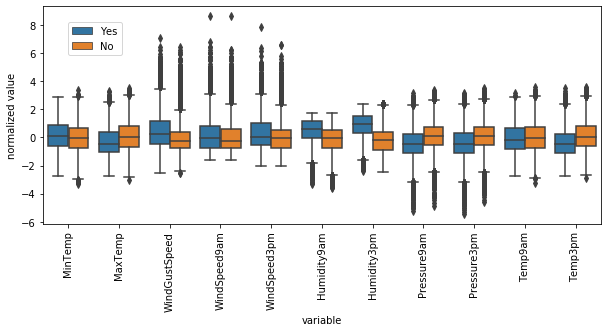

In [37]:
#Boxplot
numericall=numerical.tolist()+["RainTomorrow"]
plt.figure(figsize=(10, 4))
sns.boxplot(x="variable", y="value", hue="RainTomorrow",\
    data=pd.melt(x2_train_norm.join(y2_train).iloc[:,[x2_train_norm.join(y2_train).columns.get_loc(x) for x in numericall if x not in ["Rainfall", "RISK_MM"]]],id_vars=['RainTomorrow']))
plt.legend(bbox_to_anchor=(0.15,0.95))
plt.ylabel("normalized value")
plt.xlabel("variable")
plt.xticks(rotation=90)
plt.show()

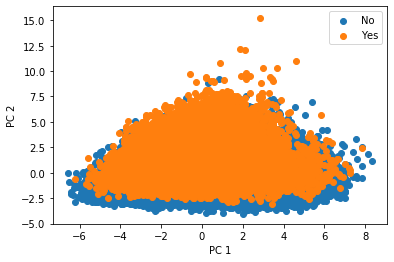

In [38]:
#Scatterplot to the first two principal components using labels
pca = PCA()
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=1)

x2_train_pca = pca.fit_transform(x2_train_norm[numerical])

colors = ['#1f77b4','#ff7f0e']
#markers = ['s', 'x', 'o']

for l, c in zip(np.unique(y2_train_norm), colors):
    plt.scatter(x2_train_pca[y2_train == l, 0], 
                x2_train_pca[y2_train == l, 1], 
                 label=l)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()

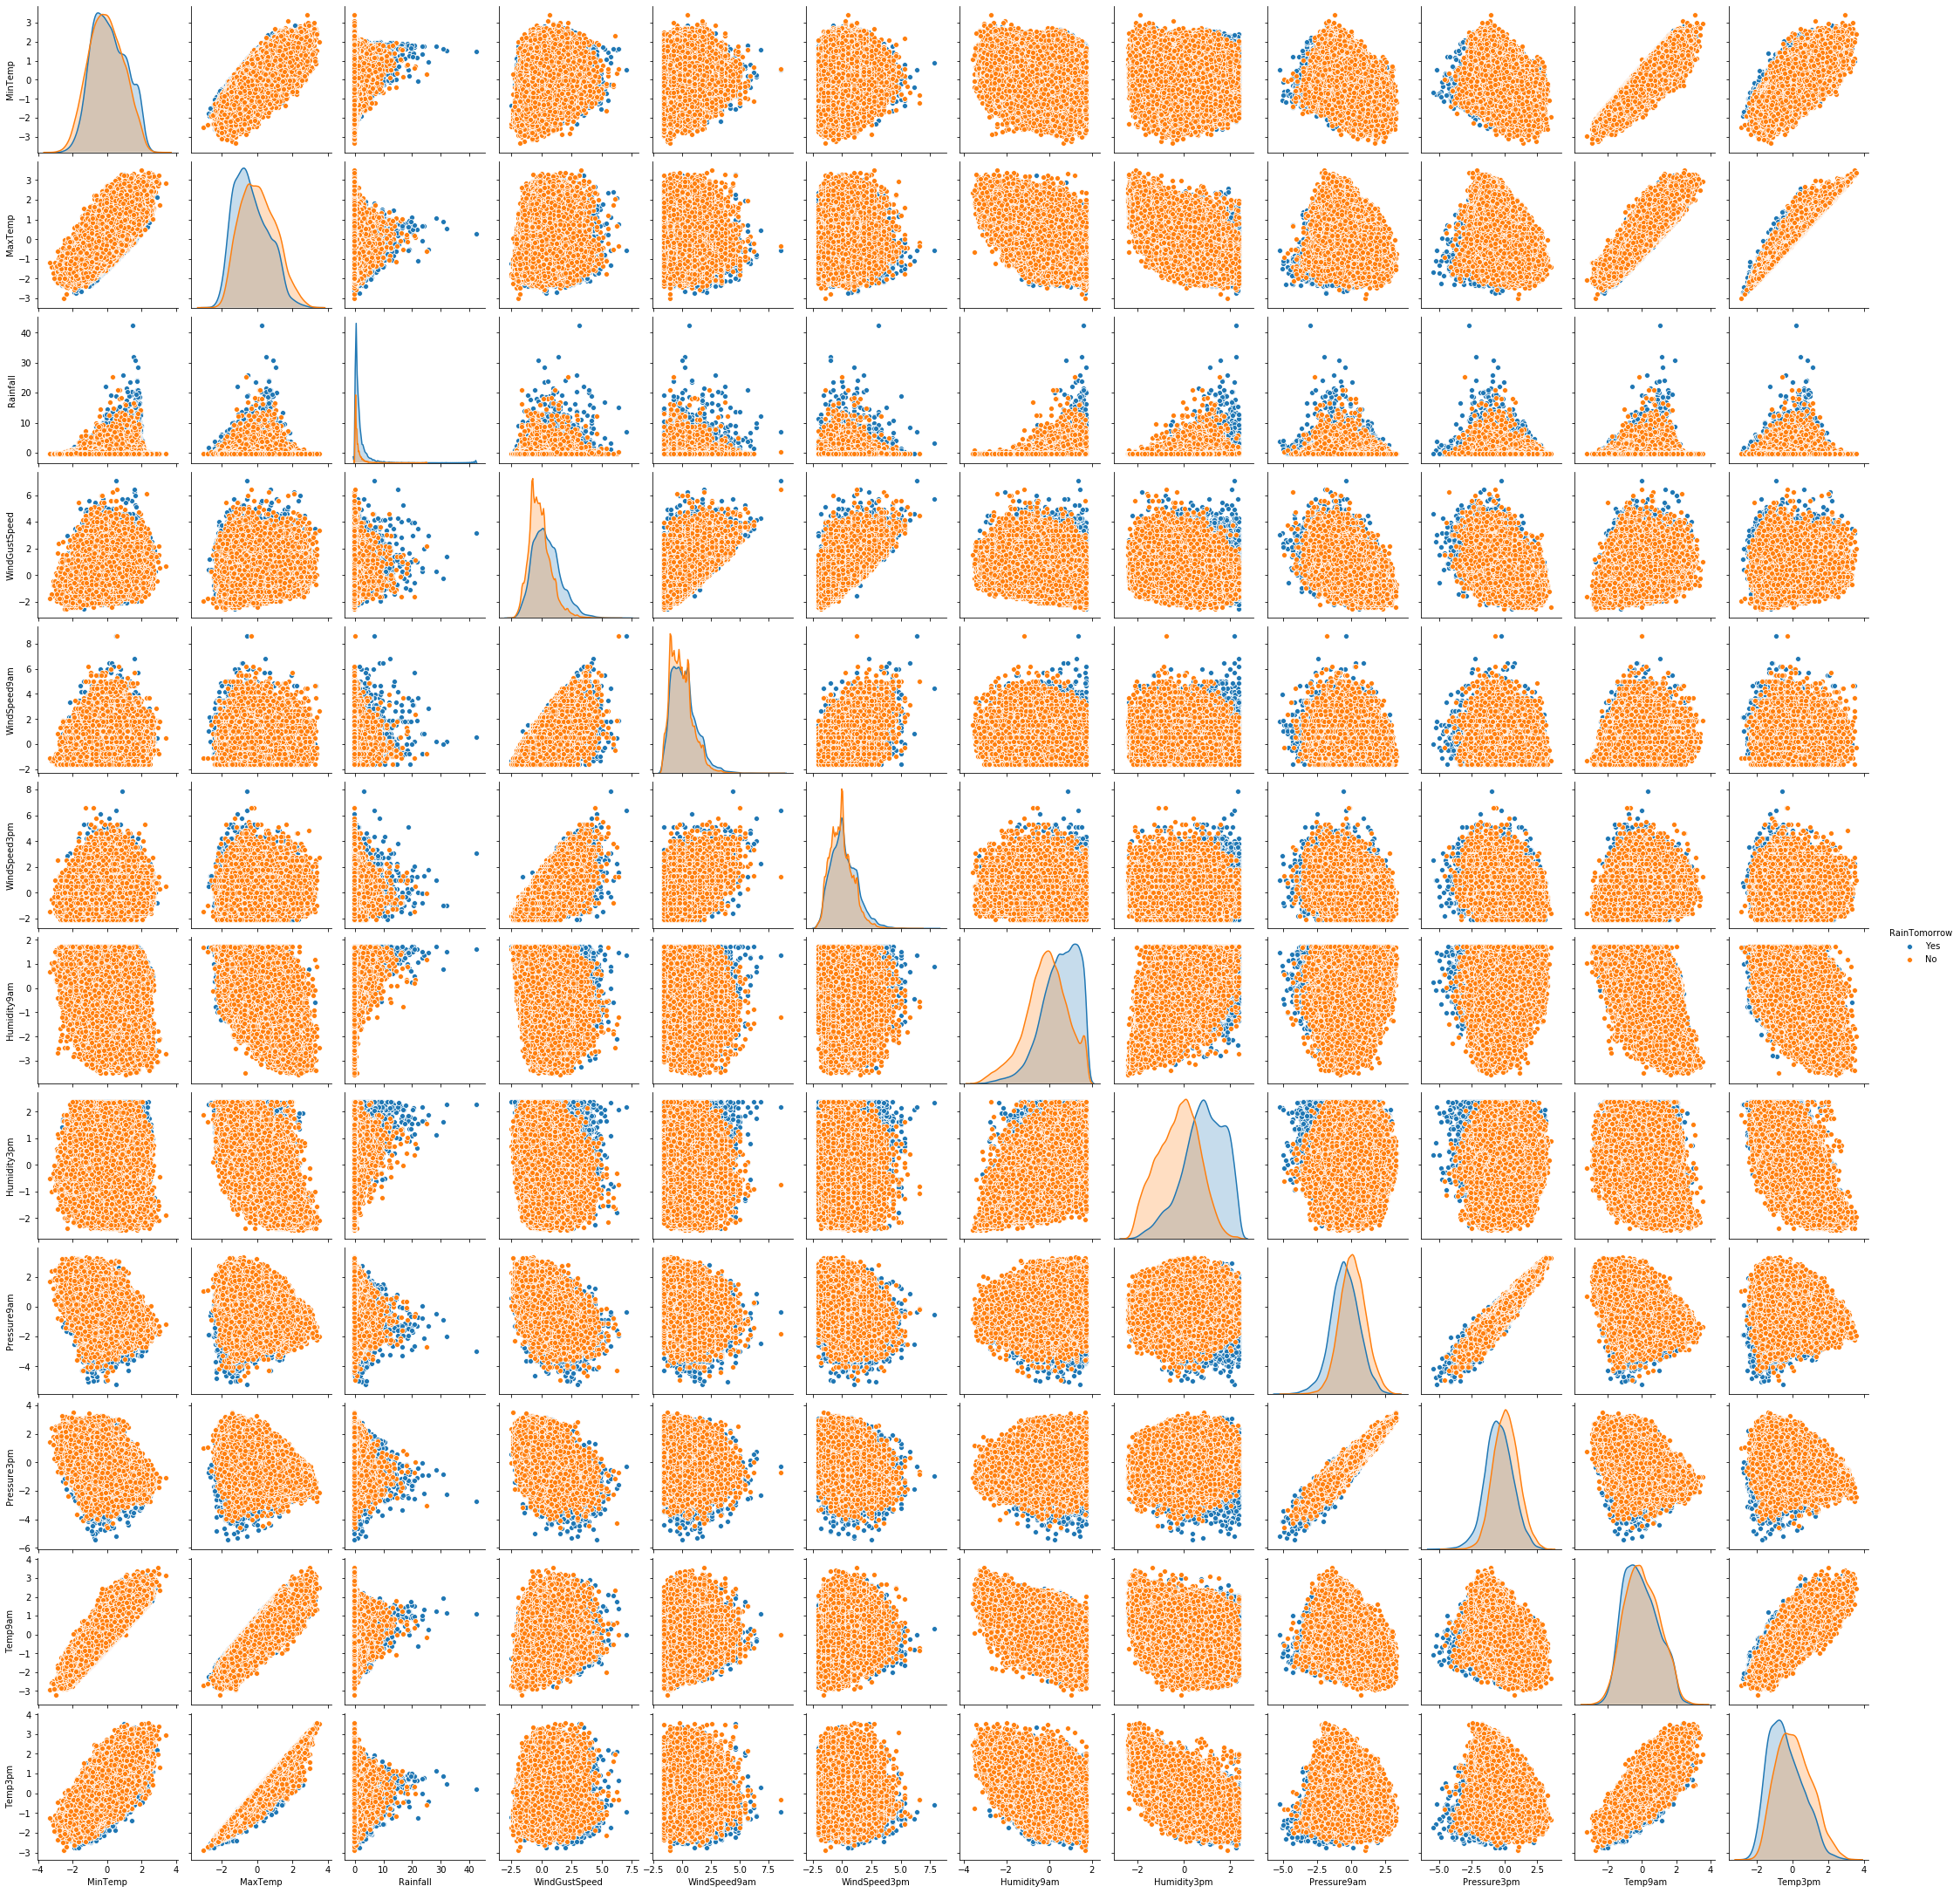

In [0]:
#boxplot of numerical variables.
sns.pairplot(x2_train_norm[numerical].join(y2_train_norm), hue="RainTomorrow")

c) Breast cancer data set

In [39]:
# Load the data set on Breast cancer detection
df3 = pd.read_csv('https://raw.githubusercontent.com/maybje/CE888/master/assignment1/data/Breast_cancer_data.csv')
df3.head()

mean_radius  mean_texture  ...  mean_smoothness  diagnosis
0        17.99         10.38  ...          0.11840          0
1        20.57         17.77  ...          0.08474          0
2        19.69         21.25  ...          0.10960          0
3        11.42         20.38  ...          0.14250          0
4        20.29         14.34  ...          0.10030          0

[5 rows x 6 columns]

In [40]:
#Before splitting into test and training set, we explore the size and the class proportions in order to confirm it has the right level of imbalance
print("Shape: ", df3.shape)
#Class proportions
print("Class Proportions:\n", df3["diagnosis"].value_counts()/df3["diagnosis"].shape)

Shape:  (569, 6)
Class Proportions:
 1    0.627417
0    0.372583
Name: diagnosis, dtype: float64


In [0]:
#Split into 90-10
X_3=df3.iloc[:,0:-1].copy()
Y_3=df3.iloc[:,-1].copy()

x_3=X_3.copy()
y_3=Y_3.copy()

features3=X_3.columns
x3_train, x3_test, y3_train, y3_test=train_test_split(x_3,y_3, train_size=0.9, random_state=21, stratify=y_3)

In [42]:
#We check the proportions of the sets to confirm the imbalance is preserved
print("Train Shape: ", x3_train.shape)
#Class proportions
print("Train class Proportions:\n", y3_train.value_counts()/y3_train.shape)

print("Test shape: ", x3_test.shape)
#Class proportions
print("Test class Proportions:\n", y3_test.value_counts()/y3_test.shape)

Train Shape:  (512, 5)
Train class Proportions:
 1    0.626953
0    0.373047
Name: diagnosis, dtype: float64
Test shape:  (57, 5)
Test class Proportions:
 1    0.631579
0    0.368421
Name: diagnosis, dtype: float64


From this point we will work with the train set only. However, every transformation based on the training set will be applied to the test set too using the parameters of functions learned in the training set.

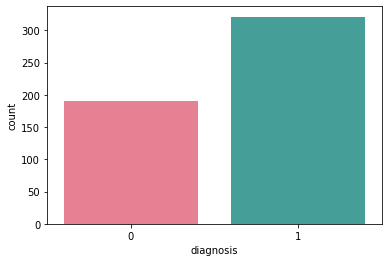

In [43]:
#plot the variables
##Response variable counts
 sns.countplot(y3_train,palette="husl")

In [44]:
#Print proportion of missing values
proportion=[]
for f in features3:
  proportion.append(x3_train[f].isna().sum(0)/x3_train.shape[0]*100)  
  print(f+": ", "{0:.2f}".format(x3_train[f].isna().sum(0)/df3.shape[0]*100))

print("Traget class: ", "{0:.2f}".format(y3_train.isna().sum(0)/y3_train.shape[0]*100))

mean_radius:  0.00
mean_texture:  0.00
mean_perimeter:  0.00
mean_area:  0.00
mean_smoothness:  0.00
Traget class:  0.00


In [45]:
# Descriptive sattistics in Latex format
print(x3_train.describe().transpose().to_latex(float_format="%.2f"))   #latex for the report.

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &   mean &    std &    min &    25\% &    50\% &    75\% &     max \\
\midrule
mean\_radius     & 512.00 &  14.10 &   3.41 &   6.98 &  11.71 &  13.46 &  15.76 &   27.42 \\
mean\_texture    & 512.00 &  19.31 &   4.23 &   9.71 &  16.17 &  18.90 &  21.73 &   33.81 \\
mean\_perimeter  & 512.00 &  91.82 &  23.46 &  43.79 &  75.20 &  87.09 & 103.73 &  186.90 \\
mean\_area       & 512.00 & 650.56 & 335.71 & 143.50 & 420.18 & 557.65 & 781.40 & 2501.00 \\
mean\_smoothness & 512.00 &   0.10 &   0.01 &   0.05 &   0.09 &   0.10 &   0.11 &    0.16 \\
\bottomrule
\end{tabular}



In [0]:
##Since the scales and distribution characteristics of the features are too different we decide to normalize them. 
#In this step we create a copy to visualize them in a boxplot.
#However during the cross-validation steps we will use the original training set and normalize it inside the loop. 
scaler=StandardScaler()
x3_train_norm=x3_train.copy()
x3_train_norm[:]=scaler.fit_transform(x3_train_norm[:])
y3_train_norm=y3_train.copy()

#normalize test set using parameters from training set.
x3_test_norm=x3_test.copy()
x3_test_norm[:]=scaler.fit_transform(x3_test_norm[:])
y3_test_norm=y3_test.copy()


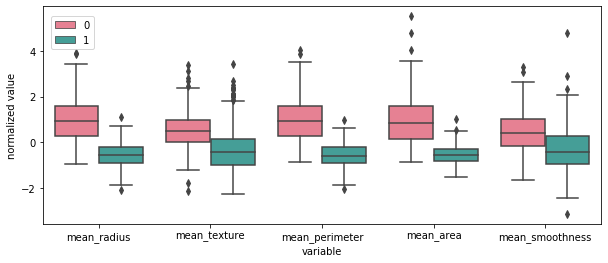

In [49]:
#Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x="variable", y="value", hue="diagnosis",\
    data=pd.melt(x3_train_norm.join(y3_train_norm).iloc[:,0:],id_vars=['diagnosis']),palette="husl")
plt.legend(bbox_to_anchor=(0.1,0.98))
plt.ylabel("normalized value")
plt.xlabel("variable")
plt.xticks()
plt.show()

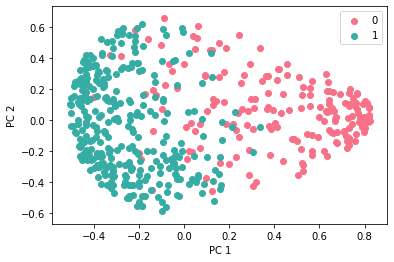

In [50]:
#Scatterplot to the first two principal components using labels
pca = PCA()
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=.1)

x3_train_pca = scikit_kpca.fit_transform(x3_train_norm)

colors = ['#f77189','#36ada4']

for l, c in zip(np.unique(y3_train_norm), colors):
    plt.scatter(x3_train_pca[y3_train == l, 0], 
                x3_train_pca[y3_train == l, 1], 
                 c=c,label=l)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()


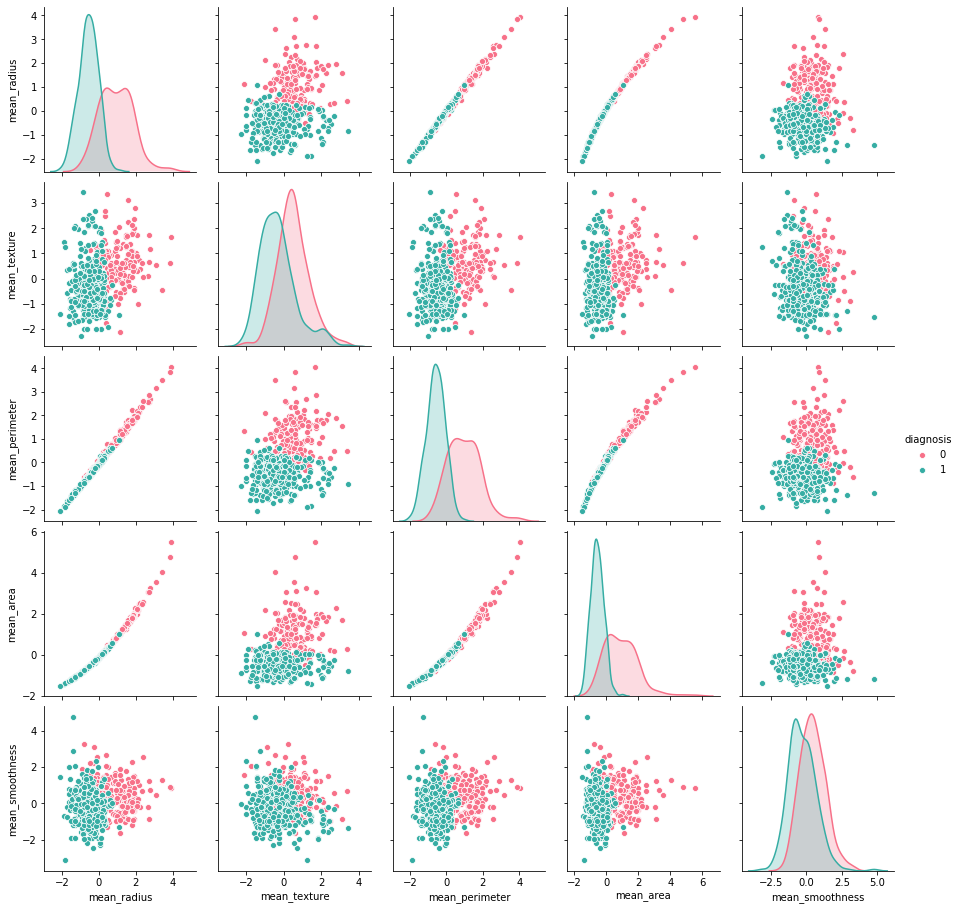

In [0]:
#Scatter plot and density plot of features.
sns.pairplot(x3_train_norm.join(y3_train_norm), hue="diagnosis", palette="husl")